In [1]:
## This is written to work no a local machine, and not Google Colab...
## ... unless there's a way to install firefox and get it to operate headless properly on that platform

!pip install -U selenium > /dev/null
!pip install webdriver-manager > /dev/null
!pip freeze > ./requirements.txt

# other useful modules 
!pip install -U pandas > /dev/null
# !pip install -U requests > /dev/null
# !pip install -U sqlalchemy > /dev/null
# !pip install -U altair > /dev/null

In [2]:
# how to time
from datetime import datetime
import time
import pandas as pd

# start = datetime.now()
# time.sleep(3)
# print(f"{(datetime.now() - start).total_seconds():.1f}")

# if (datetime.now() - start).total_seconds() >= 3.0:
#     print("elapsed time greater than 3 seconds!")

# print(f"{(datetime.now() - start).total_seconds():.1f}")


datetime.now().strftime('%Y-%m-%d')

'2023-03-29'

In [3]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.firefox.options import Options
from time import sleep
# from selenium.webdriver.common.virtual_authenticator import Credential

In [4]:
# from selenium.webdriver.firefox.service import Service.By
from selenium.webdriver.common.by import By
from webdriver_manager.firefox import GeckoDriverManager

options = Options()
# options.add_argument("-headless")

# TODO: SET this profile directory to the full path 
options.set_preference('profile', '/home/ray/Documents/ud_covid/profile')

# selium 4 driver, and new method for finding an element
driver = webdriver.Firefox(
    service=FirefoxService(GeckoDriverManager().install()), 
    options=options,
)

# https://www.selenium.dev/documentation/webdriver/waits/#implicit-wait
# implicit waits 
driver.implicitly_wait(30)

[WDM] - Downloading: 17.4kB [00:00, 15.3MB/s]                                   
[WDM] - Downloading: 17.4kB [00:00, 10.7MB/s]                                   
[WDM] - Downloading: 100%|█████████████████| 2.92M/2.92M [00:00<00:00, 4.59MB/s]


In [5]:
# first login to the EZproxy (this isn't actaully necessary for the rest of this script 
# maybe useful in the future...

driver.get('https://research.cincinnatilibrary.org/logout')
sleep(3)
driver.get('https://research.cincinnatilibrary.org/login')

username = driver.find_element(By.ID, value="user")

username.clear()
username.click()
username.send_keys('rvoelker1')

password = driver.find_element(By.ID, value="pass")
password.clear()
password.click()
password.send_keys('PASSWORD_HERE')

submit = driver.find_element(By.TAG_NAME, 'button')
submit.click()

In [6]:
# driver.get('https://chpl.org/resource/')
# sleep(3)
# driver.get('https://research.cincinnatilibrary.org/login')

In [7]:
# get the CHPL A-Z list of resources ...
driver.get('https://chpl.org/resource/')
body = driver.find_element(By.TAG_NAME, value='body')

# body = driver.findElement(by=By.tagName('body'))
# body = driver.find_element_by_tag_name('body')
# screenshot = body.screenshot_as_png

screenshot = body.screenshot_as_base64

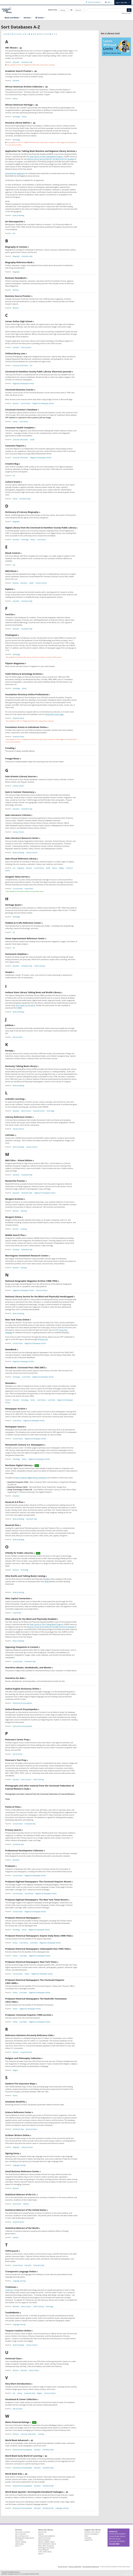

In [8]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(screenshot))

In [9]:
database_elements = body.find_elements(By.CLASS_NAME, 'resource-title')
len(database_elements)

# fill these two lists with the title (from the link) and the url  
title = []
url = []

for i, element in enumerate(database_elements):
    # anchor_element = element.find_element(By.CLASS_NAME, 'o-link--double-chevron')
    anchor_element = element.find_element(By.TAG_NAME, 'a')
    
    # print(i, element.text)
    # print(anchor_element.get_attribute('href'))
    # print('---\n')
    
    title.append(element.text)
    url.append(anchor_element.get_attribute('href'))

In [10]:
df = pd.DataFrame({
    "title": title,
    "url": url
})

df.to_csv(f"{datetime.now().strftime('%Y-%m-%d')}-research.chpl.org-links.csv")